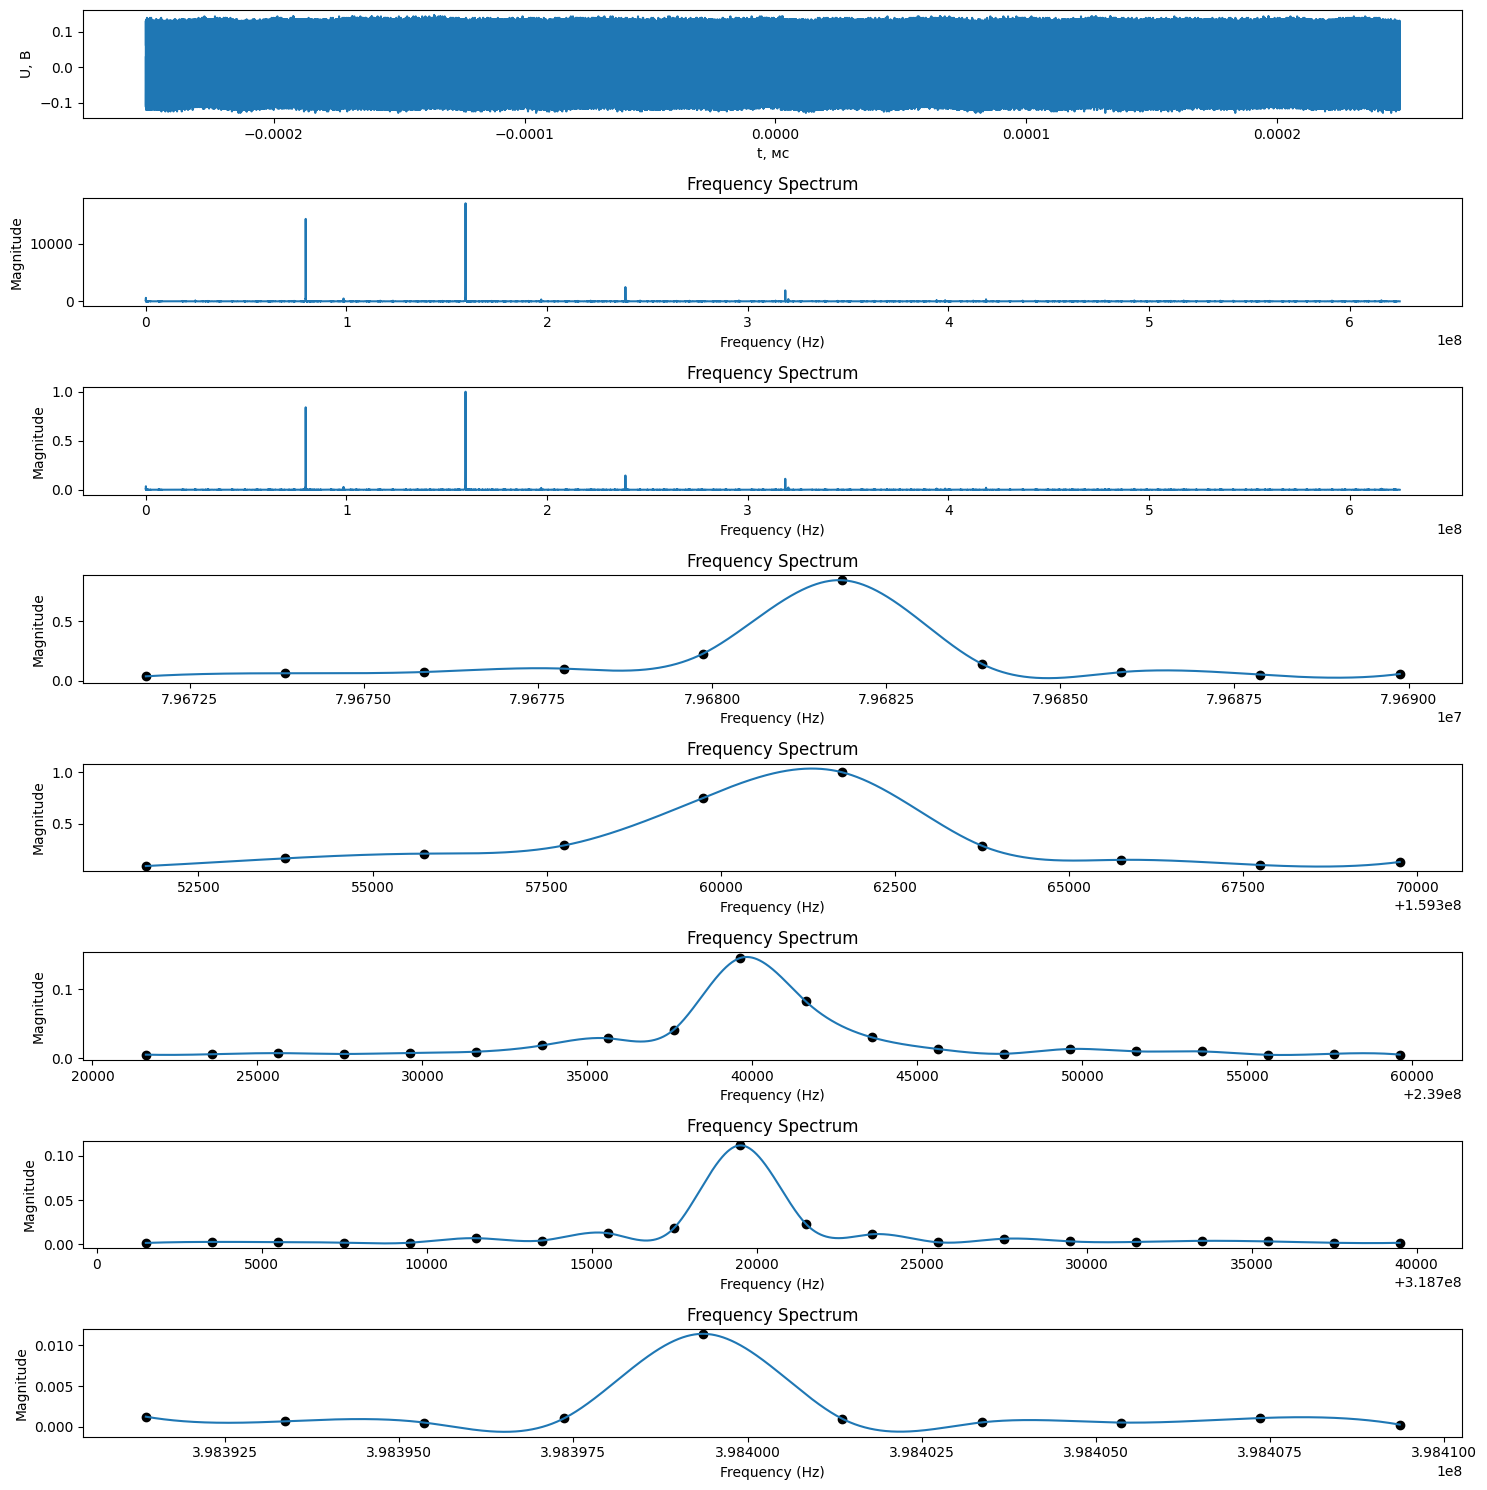

FWHM в кГц 2.768672437772155
FWHM в кГц 4.205213793665171
FWHM в кГц 3.6255567553043364
FWHM в кГц 2.6564613961577415
FWHM в кГц 2.4590419701337813
FWHM в кГц 2.768672437772155


In [ ]:
from scipy.ndimage import gaussian_filter1d
from scipy.signal import savgol_filter
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import pandas as pd
from scipy.signal import find_peaks
#%matplotlib qt 

df = pd.read_csv('50mks0.csv')
#spectr1 = np.array(df.iloc[:,0])
Spectr1 = np.array(df.iloc[:,1])
spectr1 = np.linspace(-2.5100E-04, 2.4900E-04, 625000)

dt = spectr1[1] - spectr1[0]
fft_signal = np.fft.fft(Spectr1)
fft_signal = fft_signal[:len(fft_signal)//2-1]
freq = np.fft.fftfreq(len(Spectr1), d = dt)
freq = freq[freq>0]

#sigma = 1.0
#filtered_signal = gaussian_filter1d(fft_signal, sigma)
#filtered_signal_norm = np.abs(filtered_signal)/max(abs(filtered_signal))

#filtered_signal = savgol_filter(abs(fft_signal), window_length = 4, polyorder = 3)
#filtered_signal_norm = np.abs(filtered_signal)/max(abs(filtered_signal))

filtered_signal = fft_signal
filtered_signal_norm = np.abs(filtered_signal)/max(abs(filtered_signal))

freq_1 = []
fft_signal_1 = []
for i in range(len(freq)):
    if (freq[i]>79.67e6) and (freq[i]<79.69e6):
        freq_1.append(freq[i])
        fft_signal_1.append(abs(filtered_signal_norm[i]))
freq_2 = []
fft_signal_2 = []
for i in range(len(freq)):
    if (freq[i]>159.35e6) and (freq[i]<159.37e6):
        freq_2.append(freq[i])
        fft_signal_2.append(abs(filtered_signal_norm[i]))       
freq_3 = []
fft_signal_3 = []
for i in range(len(freq)):
    if (freq[i]>239.02e6) and (freq[i]<239.06e6):
        freq_3.append(freq[i])
        fft_signal_3.append(abs(filtered_signal_norm[i]))       
freq_4 = []
fft_signal_4 = []
for i in range(len(freq)):
    if (freq[i]>318.70e6) and (freq[i]<318.74e6):
        freq_4.append(freq[i])
        fft_signal_4.append(abs(filtered_signal_norm[i]))    
freq_5 = []
fft_signal_5 = []
for i in range(len(freq)):
    if (freq[i]>398.39e6) and (freq[i]<398.41e6):
        freq_5.append(freq[i])
        fft_signal_5.append(abs(filtered_signal_norm[i]))
        
spl_1 = interp1d(np.array(freq_1), np.array(fft_signal_1), kind='cubic')
#spectr_new_1 = np.array(freq_1)
spectr_new_1 = np.linspace(freq_1[0], freq_1[-1], 10000)
Spectr_spl_1 = spl_1(spectr_new_1)

spl_2 = interp1d(np.array(freq_2), np.array(fft_signal_2), kind='cubic')
spectr_new_2 = np.linspace(freq_2[0], freq_2[-1], 10000)
Spectr_spl_2 = spl_2(spectr_new_2)

spl_3 = interp1d(np.array(freq_3), np.array(fft_signal_3), kind='cubic')
spectr_new_3 = np.linspace(freq_3[0], freq_3[-1], 10000)
Spectr_spl_3 = spl_3(spectr_new_3)

spl_4 = interp1d(np.array(freq_4), np.array(fft_signal_4), kind='cubic')
spectr_new_4 = np.linspace(freq_4[0], freq_4[-1], 10000)
Spectr_spl_4 = spl_4(spectr_new_4)

spl_5 = interp1d(np.array(freq_5), np.array(fft_signal_5), kind='cubic')
spectr_new_5 = np.linspace(freq_5[0], freq_5[-1], 10000)
Spectr_spl_5 = spl_5(spectr_new_5)

fig, ax = plt.subplots(nrows=8, ncols=1, figsize=(15, 15))
ax[0].plot(spectr1, Spectr1)
ax[0].set_xlabel('t, мс')
ax[0].set_ylabel('U, В')

ax[1].plot(freq, np.abs(filtered_signal))
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Magnitude')
ax[1].set_title('Frequency Spectrum')

ax[2].plot(freq, filtered_signal_norm)
#ax[2].set_xlim(155e6, 165e6)
ax[2].set_xlabel('Frequency (Hz)')
ax[2].set_ylabel('Magnitude')
ax[2].set_title('Frequency Spectrum')

#ax[3].axvline(x = 298268.44159920904, color='k', linestyle='-')
#ax[3].set_xlim(155e6, 165e6)  
ax[3].plot(spectr_new_1, Spectr_spl_1)
ax[3].scatter(freq_1,fft_signal_1, color = 'k')
ax[3].set_xlabel('Frequency (Hz)')
ax[3].set_ylabel('Magnitude')
ax[3].set_title('Frequency Spectrum')

ax[4].plot(spectr_new_2, Spectr_spl_2)
ax[4].scatter(freq_2,fft_signal_2, color = 'k')
#ax[4].axvline(x = 298268.44159920904, color='k', linestyle='-')
#ax[4].set_xlim(155e6, 165e6) 
ax[4].set_xlabel('Frequency (Hz)')
ax[4].set_ylabel('Magnitude')
ax[4].set_title('Frequency Spectrum')

ax[5].plot(spectr_new_3, Spectr_spl_3)
ax[5].scatter(freq_3,fft_signal_3, color = 'k')
#ax[5].axvline(x = 298268.44159920904, color='k', linestyle='-')
#ax[5].set_xlim(155e6, 165e6) 
ax[5].set_xlabel('Frequency (Hz)')
ax[5].set_ylabel('Magnitude')
ax[5].set_title('Frequency Spectrum')

ax[6].plot(spectr_new_4, Spectr_spl_4)
ax[6].scatter(freq_4,fft_signal_4, color = 'k')
#ax[6].axvline(x = 298268.44159920904, color='k', linestyle='-')
#ax[6].set_xlim(155e6, 165e6) 
ax[6].set_xlabel('Frequency (Hz)')
ax[6].set_ylabel('Magnitude')
ax[6].set_title('Frequency Spectrum')

ax[7].plot(spectr_new_5, Spectr_spl_5)
ax[7].scatter(freq_5,fft_signal_5, color = 'k')
#ax[7].axvline(x = 298268.44159920904, color='k', linestyle='-')
#ax[7].set_xlim(155e6, 165e6) 
ax[7].set_xlabel('Frequency (Hz)')
ax[7].set_ylabel('Magnitude')
ax[7].set_title('Frequency Spectrum')

plt.tight_layout()
plt.show()

fwhm_1 = []
for i in range(len(spectr_new_1)):
    if (Spectr_spl_1[i] - (max(Spectr_spl_1)/2)) >= 0 and (Spectr_spl_1[i] - (max(Spectr_spl_1)/2)) <= 0.1 :
        fwhm_1.append(spectr_new_1[i])
        #print(Spectr_spl_1[i], spectr_new_1[i])
#print(fwhm_1)
print('FWHM в кГц' ,(np.array(fwhm_1)[-1] - np.array(fwhm_1)[0])/1e3)
fwhm_2 = []
for i in range(len(spectr_new_2)):
    if (Spectr_spl_2[i]  - (max(Spectr_spl_2)/2)) >= 0 and (Spectr_spl_2[i] - (max(Spectr_spl_2)/2)) <= 0.1:
        fwhm_2.append(spectr_new_2[i])
        #print(Spectr_spl_2[i], spectr_new_2[i])
#print(fwhm_2)
print('FWHM в кГц' ,(np.array(fwhm_2)[-1] - np.array(fwhm_2)[0])/1e3)
fwhm_3 = []
for i in range(len(spectr_new_3)):
    if (Spectr_spl_3[i]  - (max(Spectr_spl_3)/2)) >= 0 and (Spectr_spl_3[i] - (max(Spectr_spl_3)/2)) <= 0.1:
        fwhm_3.append(spectr_new_3[i])
        #print(Spectr_spl_3[i], spectr_new_3[i])
#print(fwhm_3)
print('FWHM в кГц' ,(np.array(fwhm_3)[-1] - np.array(fwhm_3)[0])/1e3)
fwhm_4 = []
for i in range(len(spectr_new_4)):
    if (Spectr_spl_4[i]  - (max(Spectr_spl_4)/2)) >= 0 and (Spectr_spl_4[i] - (max(Spectr_spl_4)/2)) <= 0.1:
        fwhm_4.append(spectr_new_4[i])
        #print(Spectr_spl_4[i], spectr_new_4[i])
#print(fwhm_4)
print('FWHM в кГц' ,(np.array(fwhm_4)[-1] - np.array(fwhm_4)[0])/1e3)
fwhm_5 = []
for i in range(len(spectr_new_5)):
    if (Spectr_spl_5[i]  - (max(Spectr_spl_5)/2)) >= 0 and (Spectr_spl_5[i] - (max(Spectr_spl_5)/2)) <= 0.1:
        fwhm_5.append(spectr_new_5[i])
        #print(Spectr_spl_5[i], spectr_new_5[i])
#print(fwhm_5)
print('FWHM в кГц' ,(np.array(fwhm_5)[-1] - np.array(fwhm_5)[0])/1e3)
print('FWHM в кГц' ,(np.array(fwhm_1)[-1] - np.array(fwhm_1)[0])/1e3)
# Поиск пиков
#peaks, _ = find_peaks(abs(fft_signal))
# Определение максимального пика
#max_peak_index = peaks[np.argmax(abs(fft_signal[peaks]))]
# Значение по оси x для максимального пика
#max_x_value = freq[max_peak_index]
#print(f'Максимум спектра находится в точке x = {max_x_value:.4f}')

FWHM в кГц: 2.568992516219616
FWHM в кГц: 3.018726232171059
FWHM в кГц: 4.0380491030216215
FWHM в кГц: 4.447968982934952
FWHM в кГц: 3.2419027624130248


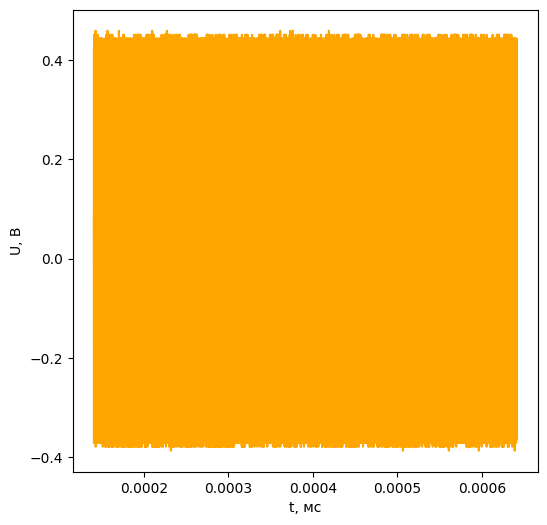

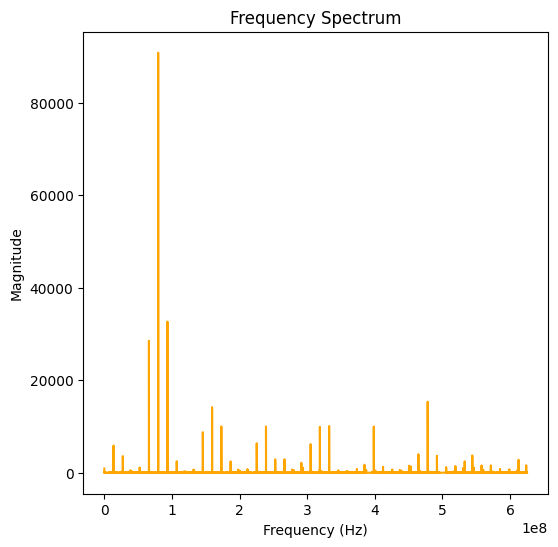

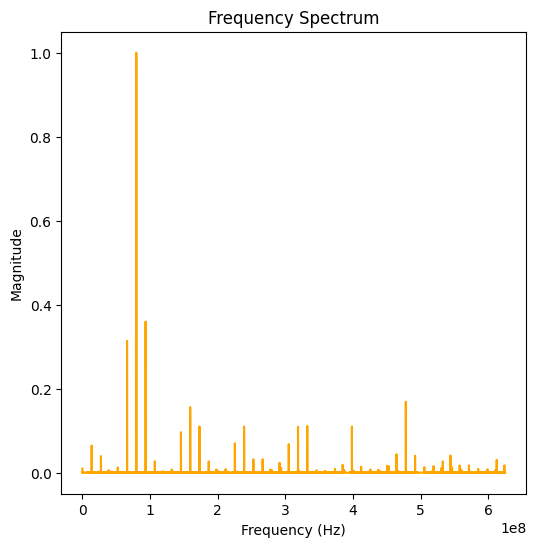

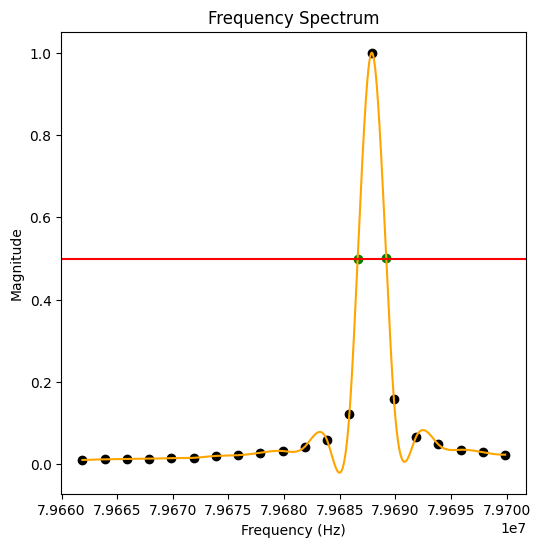

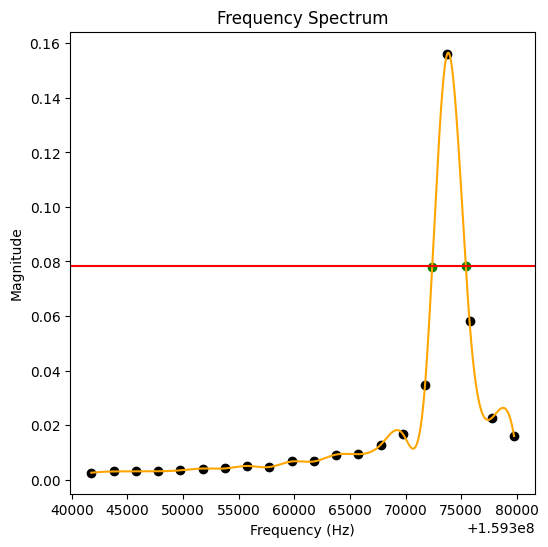

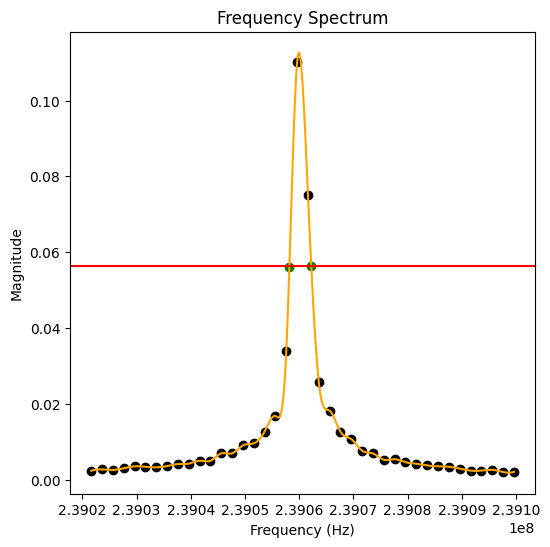

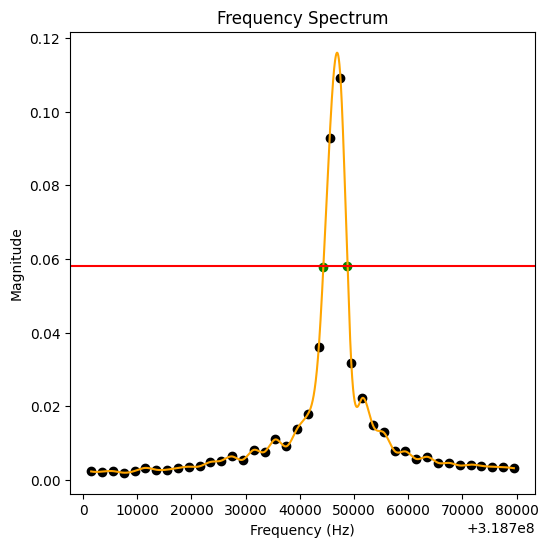

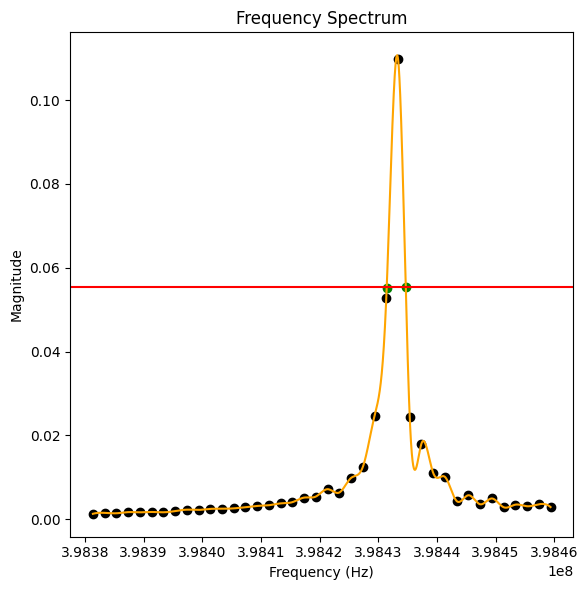

In [4]:
from scipy.ndimage import gaussian_filter1d
from scipy.signal import savgol_filter
from shapely.geometry import LineString
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import pandas as pd
from scipy.signal import find_peaks
from scipy.optimize import root_scalar

#%matplotlib qt 

df = pd.read_csv('50mks1mSA0.csv')
#spectr1 = np.array(df.iloc[:,0])
Spectr1 = np.array(df.iloc[:,1])
spectr1 = np.linspace(1.4100E-04, 6.4100E-04, 625000)

dt = spectr1[1] - spectr1[0]
fft_signal = np.fft.fft(Spectr1)
fft_signal = fft_signal[:len(fft_signal)//2-1]
freq = np.fft.fftfreq(len(Spectr1), d = dt)
freq = freq[freq>0]

#sigma = 1.0
#filtered_signal = gaussian_filter1d(fft_signal, sigma)
#filtered_signal_norm = np.abs(filtered_signal)/max(abs(filtered_signal))

#filtered_signal = savgol_filter(abs(fft_signal), window_length = 4, polyorder = 3)
#filtered_signal_norm = np.abs(filtered_signal)/max(abs(filtered_signal))

filtered_signal = fft_signal
filtered_signal_norm = np.abs(filtered_signal)/max(abs(filtered_signal))

freq_1 = []
fft_signal_1 = []
for i in range(len(freq)):
    if (freq[i]>79.66e6) and (freq[i]<79.7e6):
        freq_1.append(freq[i])
        fft_signal_1.append(abs(filtered_signal_norm[i]))
freq_2 = []
fft_signal_2 = []
for i in range(len(freq)):
    if (freq[i]>159.34e6) and (freq[i]<159.38e6):
        freq_2.append(freq[i])
        fft_signal_2.append(abs(filtered_signal_norm[i]))       
freq_3 = []
fft_signal_3 = []
for i in range(len(freq)):
    if (freq[i]>239.02e6) and (freq[i]<239.1e6):
        freq_3.append(freq[i])
        fft_signal_3.append(abs(filtered_signal_norm[i]))       
freq_4 = []
fft_signal_4 = []
for i in range(len(freq)):
    if (freq[i]>318.70e6) and (freq[i]<318.78e6):
        freq_4.append(freq[i])
        fft_signal_4.append(abs(filtered_signal_norm[i]))    
freq_5 = []
fft_signal_5 = []
for i in range(len(freq)):
    if (freq[i]>398.38e6) and (freq[i]<398.46e6):
        freq_5.append(freq[i])
        fft_signal_5.append(abs(filtered_signal_norm[i]))
        
spl_1 = interp1d(np.array(freq_1), np.array(fft_signal_1), kind='cubic')
#spectr_new_1 = np.array(freq_1)
spectr_new_1 = np.linspace(freq_1[0], freq_1[-1], 10000)
Spectr_spl_1 = spl_1(spectr_new_1)

spl_2 = interp1d(np.array(freq_2), np.array(fft_signal_2), kind='cubic')
spectr_new_2 = np.linspace(freq_2[0], freq_2[-1], 10000)
Spectr_spl_2 = spl_2(spectr_new_2)

spl_3 = interp1d(np.array(freq_3), np.array(fft_signal_3), kind='cubic')
spectr_new_3 = np.linspace(freq_3[0], freq_3[-1], 10000)
Spectr_spl_3 = spl_3(spectr_new_3)

spl_4 = interp1d(np.array(freq_4), np.array(fft_signal_4), kind='cubic')
spectr_new_4 = np.linspace(freq_4[0], freq_4[-1], 10000)
Spectr_spl_4 = spl_4(spectr_new_4)

spl_5 = interp1d(np.array(freq_5), np.array(fft_signal_5), kind='cubic')
spectr_new_5 = np.linspace(freq_5[0], freq_5[-1], 10000)
Spectr_spl_5 = spl_5(spectr_new_5)

def difference(x):
    return spl_1(x) - max(Spectr_spl_1)/2
intersections_1 = []
crossings_1 = []
for i in range(len(spectr_new_1) - 1):
    a, b = spectr_new_1[i], spectr_new_1[i + 1]
    if difference(a) * difference(b) < 0:  # Проверка смены знака
        sol = root_scalar(difference, bracket=[a, b], method='brentq')
        intersections_1.append(sol.root)
        crossings_1.append((sol.root, Spectr_spl_1[i]))
print(f"FWHM в кГц: {(intersections_1[-1] - intersections_1[0])/1e3}")

def difference(x):
    return spl_2(x) - max(Spectr_spl_2)/2
intersections_2 = []
crossings_2 = []
for i in range(len(spectr_new_2) - 1):
    a, b = spectr_new_2[i], spectr_new_2[i + 1]
    if difference(a) * difference(b) < 0:  # Проверка смены знака
        sol = root_scalar(difference, bracket=[a, b], method='brentq')
        intersections_2.append(sol.root)
        crossings_2.append((sol.root, Spectr_spl_2[i]))
print(f"FWHM в кГц: {(intersections_2[-1] - intersections_2[0])/1e3}")

def difference(x):
    return spl_3(x) - max(Spectr_spl_3)/2
intersections_3 = []
crossings_3 = []
for i in range(len(spectr_new_3) - 1):
    a, b = spectr_new_3[i], spectr_new_3[i + 1]
    if difference(a) * difference(b) < 0:  # Проверка смены знака
        sol = root_scalar(difference, bracket=[a, b], method='brentq')
        intersections_3.append(sol.root)
        crossings_3.append((sol.root, Spectr_spl_3[i]))
print(f"FWHM в кГц: {(intersections_3[-1] - intersections_3[0])/1e3}")

def difference(x):
    return spl_4(x) - max(Spectr_spl_4)/2
intersections_4 = []
crossings_4 = []
for i in range(len(spectr_new_4) - 1):
    a, b = spectr_new_4[i], spectr_new_4[i + 1]
    if difference(a) * difference(b) < 0:  # Проверка смены знака
        sol = root_scalar(difference, bracket=[a, b], method='brentq')
        intersections_4.append(sol.root)
        crossings_4.append((sol.root, Spectr_spl_4[i]))
print(f"FWHM в кГц: {(intersections_4[-1] - intersections_4[0])/1e3}")

def difference(x):
    return spl_5(x) - max(Spectr_spl_5)/2
intersections_5 = []
crossings_5 = []
for i in range(len(spectr_new_5) - 1):
    a, b = spectr_new_5[i], spectr_new_5[i + 1]
    if difference(a) * difference(b) < 0:  # Проверка смены знака
        sol = root_scalar(difference, bracket=[a, b], method='brentq')
        intersections_5.append(sol.root)
        crossings_5.append((sol.root, Spectr_spl_5[i]))
print(f"FWHM в кГц: {(intersections_5[-1] - intersections_5[0])/1e3}")
plt.figure(figsize=(6,6))
plt.plot(spectr1, Spectr1, color='orange')
plt.xlabel('t, мс')
plt.ylabel('U, В')
plt.figure(figsize=(6,6))
plt.plot(freq, np.abs(filtered_signal), color='orange')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum')
plt.figure(figsize=(6,6))
plt.plot(freq, filtered_signal_norm, color='orange')
#ax[2].set_xlim(155e6, 165e6)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum')
plt.figure(figsize=(6,6))
#ax[3].axvline(x = 298268.44159920904, color='k', linestyle='-')
#ax[3].set_xlim(155e6, 165e6)  
plt.plot(spectr_new_1, Spectr_spl_1, color='orange')
plt.axhline(y = max(Spectr_spl_1)/2, color = 'red')
plt.scatter(freq_1,fft_signal_1, color = 'k')
plt.scatter([c[0] for c in crossings_1], [c[1] for c in crossings_1], color='green')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum')
plt.figure(figsize=(6,6))
plt.plot(spectr_new_2, Spectr_spl_2, color='orange')
plt.axhline(y = max(Spectr_spl_2)/2, color = 'red')
plt.scatter([c[0] for c in crossings_2], [c[1] for c in crossings_2], color='green')
plt.scatter(freq_2,fft_signal_2, color = 'k')
#ax[4].axvline(x = 298268.44159920904, color='k', linestyle='-')
#ax[4].set_xlim(155e6, 165e6) 
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum')
plt.figure(figsize=(6,6))
plt.plot(spectr_new_3, Spectr_spl_3, color='orange')
plt.scatter([c[0] for c in crossings_3], [c[1] for c in crossings_3], color='green')
plt.scatter(freq_3,fft_signal_3, color = 'k')
plt.axhline(y = max(Spectr_spl_3)/2, color = 'red')
#ax[5].axvline(x = 298268.44159920904, color='k', linestyle='-')
#ax[5].set_xlim(155e6, 165e6) 
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum')
plt.figure(figsize=(6,6))
plt.plot(spectr_new_4, Spectr_spl_4, color='orange')
plt.scatter([c[0] for c in crossings_4], [c[1] for c in crossings_4], color='green')
plt.scatter(freq_4,fft_signal_4, color = 'k')
plt.axhline(y = max(Spectr_spl_4)/2, color = 'red')
#ax[6].axvline(x = 298268.44159920904, color='k', linestyle='-')
#ax[6].set_xlim(155e6, 165e6) 
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum')
plt.figure(figsize=(6,6))
plt.plot(spectr_new_5, Spectr_spl_5, color='orange')
plt.scatter([c[0] for c in crossings_5], [c[1] for c in crossings_5], color='green')
plt.scatter(freq_5,fft_signal_5, color = 'k')
plt.axhline(y = max(Spectr_spl_5)/2, color = 'red')
#ax[7].axvline(x = 298268.44159920904, color='k', linestyle='-')
#ax[7].set_xlim(155e6, 165e6) 
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum')
plt.tight_layout()
plt.show()
# Поиск пиков
#peaks, _ = find_peaks(abs(fft_signal))
# Определение максимального пика
#max_peak_index = peaks[np.argmax(abs(fft_signal[peaks]))]
# Значение по оси x для максимального пика
#max_x_value = freq[max_peak_index]
#print(f'Максимум спектра находится в точке x = {max_x_value:.4f}')

FWHM в кГц: 2.7699216320365667
Максимум спектра находится в точке x = 79.6818 МГц


Text(0.5, 1.0, 'Frequency Spectrum')

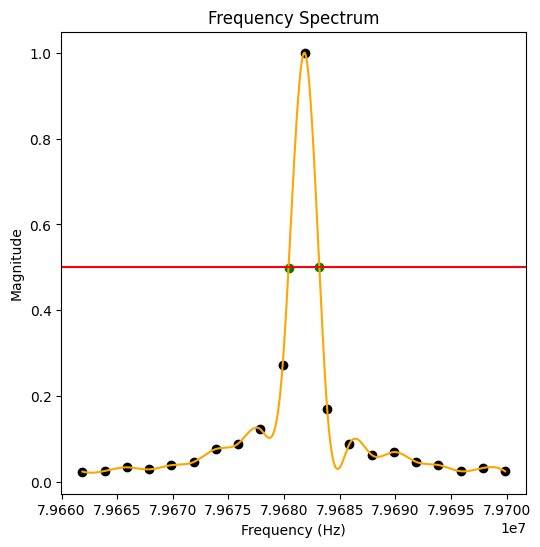

In [ ]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import pandas as pd
from scipy.signal import find_peaks
from scipy.optimize import root_scalar

df = pd.read_csv('50mks0.csv')
Spectr1 = np.array(df.iloc[:,1])
spectr1 = np.linspace(-2.5100E-04, 2.4900E-04, 625000)

dt = spectr1[1] - spectr1[0]
fft_signal = np.fft.fft(Spectr1)
fft_signal = fft_signal[:len(fft_signal)//2-1]
freq = np.fft.fftfreq(len(Spectr1), d = dt)
freq = freq[freq>0]

filtered_signal = fft_signal
filtered_signal_norm = np.abs(filtered_signal)/max(abs(filtered_signal))

freq_1 = []
fft_signal_1 = []
for i in range(len(freq)):
    if (freq[i]>79.66e6) and (freq[i]<79.7e6):
        freq_1.append(freq[i])
        fft_signal_1.append(abs(filtered_signal[i]))
        
spl_1 = interp1d(np.array(freq_1), np.array(fft_signal_1)/max(fft_signal_1), kind='cubic')
spectr_new_1 = np.linspace(freq_1[0], freq_1[-1], 10000)
Spectr_spl_1 = spl_1(spectr_new_1)

def difference(x):
    return spl_1(x) - 1/2
intersections_1 = []
crossings_1 = []
for i in range(len(spectr_new_1) - 1):
    a, b = spectr_new_1[i], spectr_new_1[i + 1]
    if difference(a) * difference(b) < 0:  # Проверка смены знака
        sol = root_scalar(difference, bracket=[a, b], method='brentq')
        intersections_1.append(sol.root)
        crossings_1.append((sol.root, Spectr_spl_1[i]))
print(f"FWHM в кГц: {(intersections_1[-1] - intersections_1[0])/1e3}")

# Поиск пиков
peaks, _ = find_peaks(Spectr_spl_1)
# Определение максимального пика
max_peak_index = peaks[np.argmax(Spectr_spl_1[peaks])]
# Значение по оси x для максимального пика
max_x_value = spectr_new_1[max_peak_index]
print(f'Максимум спектра находится в точке x = {max_x_value/1e6:.4f} МГц')

plt.figure(figsize=(6,6))
plt.plot(spectr_new_1, Spectr_spl_1, color='orange')
plt.axhline(y = 1/2, color = 'red')
plt.scatter(freq_1,fft_signal_1/max(fft_signal_1), color = 'k')
plt.scatter([c[0] for c in crossings_1], [c[1] for c in crossings_1], color='green')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum')